In [104]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
print type(iris)
X = iris.data[:, [2, 3]]

y = iris.target
print X,y

<class 'sklearn.datasets.base.Bunch'>
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.7  0.4]
 [ 1.4  0.3]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.5  0.2]
 [ 1.6  0.2]
 [ 1.4  0.1]
 [ 1.1  0.1]
 [ 1.2  0.2]
 [ 1.5  0.4]
 [ 1.3  0.4]
 [ 1.4  0.3]
 [ 1.7  0.3]
 [ 1.5  0.3]
 [ 1.7  0.2]
 [ 1.5  0.4]
 [ 1.   0.2]
 [ 1.7  0.5]
 [ 1.9  0.2]
 [ 1.6  0.2]
 [ 1.6  0.4]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.6  0.2]
 [ 1.6  0.2]
 [ 1.5  0.4]
 [ 1.5  0.1]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.2  0.2]
 [ 1.3  0.2]
 [ 1.5  0.1]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.3  0.3]
 [ 1.3  0.3]
 [ 1.3  0.2]
 [ 1.6  0.6]
 [ 1.9  0.4]
 [ 1.4  0.3]
 [ 1.6  0.2]
 [ 1.4  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 4.7  1.4]
 [ 4.5  1.5]
 [ 4.9  1.5]
 [ 4.   1.3]
 [ 4.6  1.5]
 [ 4.5  1.3]
 [ 4.7  1.6]
 [ 3.3  1. ]
 [ 4.6  1.3]
 [ 3.9  1.4]
 [ 3.5  1. ]
 [ 4.2  1.5]
 [ 4.   1. ]
 [ 4.7  1.4]
 [ 3.6  1.3]
 [ 4.4  1.4]
 [ 4.5  1.5]
 [ 4.1  1. ]
 [ 4.5  1.5]
 [ 3.9  1.1]
 [ 4.8  1.8]
 [ 4.   1.3]
 [ 4.9  1.5]
 [ 4.7  1.2]


In [105]:
# 可以将数据随机分割，test_data, train_data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=0)
print len(X_train), len(X_test), len(y_train), len(y_test)


105 45 105 45


In [106]:
# 数据预处理模块，可以将数据标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [107]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=30, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=30, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [116]:
y_pred = ppn.predict(X_test_std)
print y_pred
print("Misclassified samples: %d" % (y_test != y_pred).sum())

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 0 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Misclassified samples: 2


In [109]:
from sklearn.metrics import accuracy_score
print ("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [110]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)
    # highlight test samples
    # print X_test
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

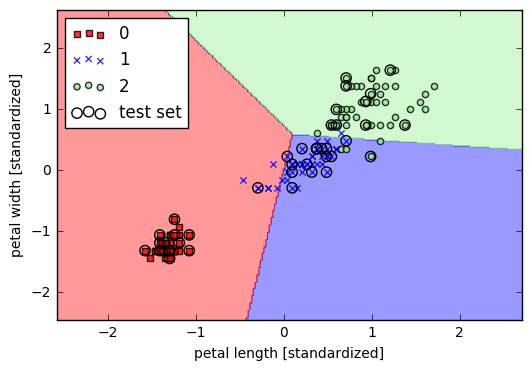

In [111]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.savefig('test.png', dpi = 100)
plt.show()

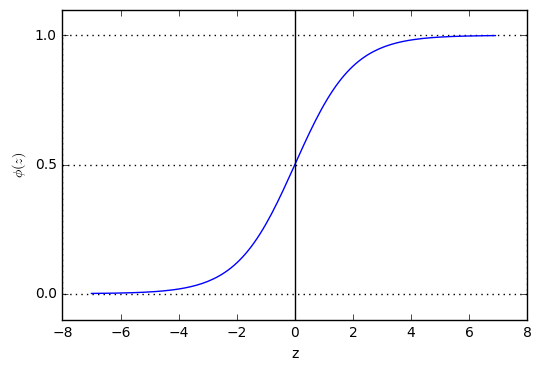

In [112]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0, color = 'k')  # 在坐标轴上加一条竖直的线，0.0为竖直线在坐标轴上的位置
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')# 加水线通过坐标轴
plt.yticks([0.0, 0.5, 1.0])# 加y轴刻度
plt.ylim(-0.1, 1.1)# 加y轴范围
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()

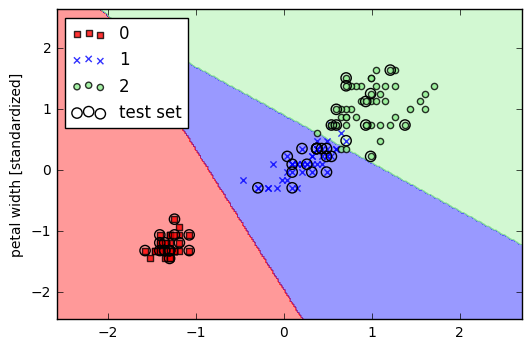

In [113]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                    y_combined, classifier=lr,
                    test_idx=range(105,150))
plt.ylabel('petal length [standarized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [115]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X_std = []
print X[:, 0].mean()
print X[:, 0].std()
X_std[:0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
print X_std
print np.sqrt(2.0/3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)
print X_train_std

1.0
0.816496580928
[0.0, 1.2247448713915889, -1.2247448713915889]
0.816496580928
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


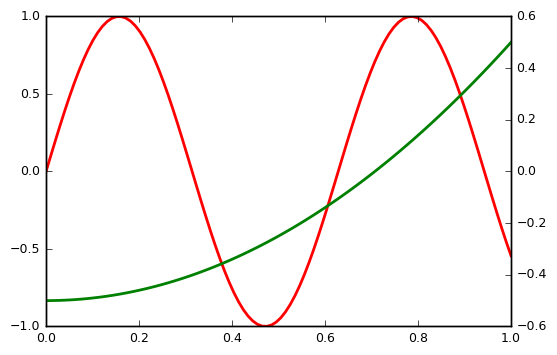

In [126]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1)) 
    _, y2 = ax2.transData.transform((0, v2)) 
    inv = ax2.transData.inverted() 
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2)) 
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy) 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

x = np.linspace(0, 1, 100)
y1 = np.sin(10*x)
y2 = x**2-0.5

ax1.plot(x, y1, "r", lw=2)
ax2.plot(x, y2, "g", lw=2)

#align_yaxis(ax1, 0, ax2, 0)
plt.show()

In [128]:
plt.plot

<function matplotlib.pyplot.plot>

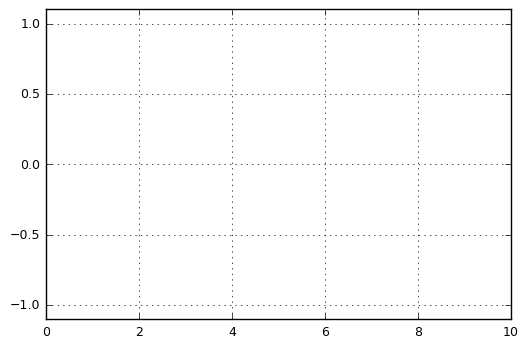

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()